# Natural Language Processing 3 - Text generation with transformers

In [ ]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

## 1 Introduction

![Optimus Prime](https://upload.wikimedia.org/wikipedia/en/0/03/Optimusprime-armada.png)

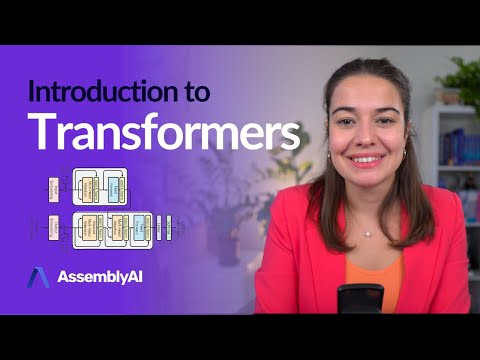

In [ ]:
YouTubeVideo("_UVfwBqcnbM", width=800, height=500)

### 1.1 What are transformers?

Transformers are a type of deep learning architecture used in natural language processing (NLP) tasks and other areas of machine learning. They were introduced in the paper ["Attention is All You Need" by Vaswani et al. in 2017](https://arxiv.org/abs/1706.03762). Transformers are **sequence-to-sequence** models. They are built on the concept of **self-attention** mechanisms, which allow the model to weigh and consider different parts of an input sequence when making predictions.

The main components of a transformer architecture are the **encoder** and the **decoder**. The encoder processes the input sequence, while the decoder generates the output sequence. Both the encoder and the decoder consist of multiple layers, each containing self-attention and feed-forward sublayers.

A key innovation in transformers is the use of self-attention, which allows the model to dynamically determine the importance of each word in a sequence relative to the others. This is particularly useful for understanding context and capturing long-range dependencies in the input.

Transformers have become very popular in NLP due to their ability to handle large-scale data and achieve state-of-the-art performance on a wide range of tasks, such as machine translation, text summarization, sentiment analysis, and more. Some well-known transformer-based models include BERT, GPT, T5, and RoBERTa.

### 1.2 The attention mechanism

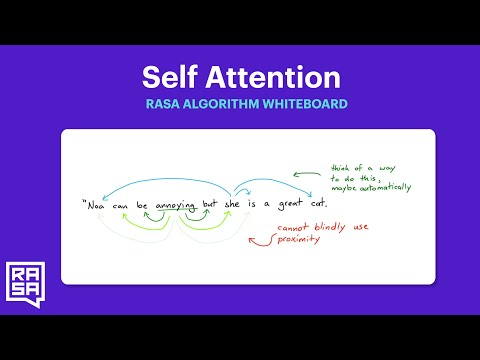

In [ ]:
YouTubeVideo("yGTUuEx3GkA", width=800, height=500)

The attention mechanism in transformers is a technique that helps the model focus on different parts of an input sequence when making predictions. Think of it as a way for the model to decide which words are important and deserve more "attention" at each step.

Let's use a simple example to explain how the attention mechanism works. Imagine you have a sentence like "The cat sat on the mat." When translating this sentence into another language, it's important for the model to understand the relationships between the words.

The attention mechanism calculates a score for each word in the sentence, indicating how relevant it is to the current word being processed. For instance, when translating the word "cat," the attention mechanism might assign higher scores to "The" and "sat" because they are more closely related to "cat" than "on" or "mat."

Once the model has these scores, it uses them to create a weighted sum of the input words, which helps it understand the context of the current word. This weighted sum is then used in the next layers of the transformer to make predictions or generate output.

In summary, the attention mechanism in transformers helps the model focus on different parts of the input sequence, depending on the context. It allows the model to capture important relationships between words and helps improve performance on tasks like translation, summarization, and many others.

The following code cells will visualize the self-attention mechanism:

In [ ]:
# Install required libraries
# transformers - library from Huggingface with a huge number of pre-trained transformer models
# bertviz - library from Huggingface that provides visualization features for BERT models
%pip install transformers bertviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 KB 11.5 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from bertviz.transformers_neuron_view import BertModel
from bertviz.neuron_view import show

model_ckpt = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = BertModel.from_pretrained(model_ckpt)
text = "If I want to try a new sentence" #TRY WITH YOUR OWN SENTENCE
show(model, "bert", tokenizer, text, display_mode="light", layer=0, head=8)

Output hidden; open in https://colab.research.google.com to view.

### 1.3 Transformers as "auto-regressive" language models

Auto-regressive language models are a type of language model that generate text by predicting **one word at a time**, conditioning on the **previously generated words**. In other words, they generate output in a sequential, left-to-right manner, with each new word being based on the words that came before it.

To understand this better, consider an example where the model is asked to complete the sentence "The cat is on the ____." An auto-regressive language model will generate the next word by considering the probability distribution of all possible words given the current context "The cat is on the." It will then choose a word (e.g., "mat") based on this probability distribution and add it to the sentence. The process continues until the model generates a **stop token** or reaches a **predefined maximum length**.

Auto-regressive language models are commonly used for a variety of natural language processing tasks, such as text generation, machine translation, and summarization. The GPT (Generative Pre-trained Transformer) series of models, developed by OpenAI, are well-known examples of auto-regressive language models. They have achieved state-of-the-art performance on numerous NLP benchmarks due to their ability to capture context and generate coherent and contextually relevant text.

In short, *auto-regressive* language generation is based on the assumption that the probability distribution of a word sequence can be decomposed into the product of conditional next word distributions: 
$$ P(w_{1:T} | W_0 ) = \prod_{t=1}^T P(w_{t} | w_{1: t-1}, W_0) \text{ ,with }  w_{1: 0} = \emptyset, $$

and $W_0$ being the initial *context* word sequence. The length $T$ of the word sequence is usually determined *on-the-fly* and corresponds to the timestep $t=T$ the EOS token is generated from $P(w_{t} | w_{1: t-1}, W_{0})$.

### 1.4 Generating text with transformers

Text generation with a transformer follows the following sequence of steps:

1. Tokenization: The input text is first tokenized, which means breaking it down into smaller units called tokens. These tokens can represent words, subwords, or characters, depending on the tokenization strategy.

2. Positional Encoding: Transformers don't have any inherent notion of the order of tokens in a sequence. To address this, positional encoding is added to the token embeddings, which helps the model understand the position of each token in the input sequence.

3. Encoder: If the transformer model has an encoder, it processes the input sequence to create contextual representations. For example, in a translation task, the source sentence is fed into the encoder.

4. Decoder: In a conditional text generation task, such as machine translation or summarization, the decoder generates the output sequence. It starts with a special token, often called the start-of-sequence (SOS) token.

5. Auto-regressive Generation: The transformer generates text one token at a time using an auto-regressive process. At each step, the model considers the previously generated tokens and the output of the encoder (if present) to predict the next token. It does this by applying self-attention and cross-attention (if there's an encoder) mechanisms, along with position-wise feed-forward networks, in the layers of the decoder.

6. Greedy, sampling or beam search: To generate the next token, the transformer computes a probability distribution over the vocabulary. A token can be selected using different strategies, such as greedy decoding (picking the token with the highest probability), sampling from the distribution, or using a more advanced technique like beam search, which explores multiple possible sequences simultaneously. (More on this in the next section).

7. Iteration: The process continues, generating one token at a time, until a predefined maximum length is reached or a special end-of-sequence (EOS) token is generated.

## 2 Demonstration of text generation using a GPT2 model

The following sections were adapted from the [tutorials](https://huggingface.co/docs/transformers/notebooks) on the official [HuggingFace](https://huggingface.co/) website. Visit [HuggingFace](https://huggingface.co/) to learn more about transformers in general and to use the latest (pre-trained) models for your own NLP projects!

### 2.1 Setup

Let's quickly install transformers and load the model. We will use GPT2 in Tensorflow 2.1 for demonstration.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q tensorflow==2.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Could not find a version that satisfies the requirement tensorflow==2.1 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.1


In [8]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer


tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# add the EOS token as PAD token to avoid warnings
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


### 2.2 A simple text-generation approach - Greedy Search

Greedy search simply selects the word with the highest probability as its next word: $w_t = argmax_{w}P(w | w_{1:t-1})$ at each timestep $t$. The following sketch shows greedy search. 

![Greedy Search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/greedy_search.png)

Starting from the word $\text{"The"}$, the algorithm 
greedily chooses the next word of highest probability $\text{"nice"}$ and so on, so that the final generated word sequence is $\text{"The", "nice", "woman"}$ having an overall probability of $0.5 \times 0.4 = 0.2$.

In the following we will generate word sequences using GPT2 on the context $(\text{"I", "enjoy", "walking", "with", "my", "cute", "dog"})$. Let's see how greedy search can be used in `transformers` as follows:

In [11]:
# encode context the generation is conditioned on
input_ids = tokenizer.encode('What if i want to try a new', return_tensors='tf')

# generate text until the output length (which includes the context length) reaches 50
greedy_output = model.generate(input_ids, max_length=50)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(greedy_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new game?

I want to try a new game.

I want to try a new game.

I want to try a new game.

I want to try a new game.


Alright! We have generated our first short text with GPT2 😊. The generated words following the context are reasonable, but the model quickly starts repeating itself! This is a very common problem in language generation in general and seems to be even more so in greedy and beam search - check out [Vijayakumar et al., 2016](https://arxiv.org/abs/1610.02424) and [Shao et al., 2017](https://arxiv.org/abs/1701.03185).

The major drawback of greedy search though is that it misses high probability words hidden behind a low probability word as can be seen in our sketch above:

The word $\text{"has"}$ with its high conditional probability of $0.9$ is hidden behind the word $\text{"dog"}$, which has only the second-highest conditional probability, so that greedy search misses the word sequence $\text{"The"}, \text{"dog"}, \text{"has"}$.

Thankfully, we have beam search to alleviate this problem!


### 2.3 Improving the text-generation performance - Beam search

Beam search reduces the risk of missing hidden high probability word sequences by keeping the most likely `num_beams` of hypotheses at each time step and eventually choosing the hypothesis that has the overall highest probability. Let's illustrate with `num_beams=2`:

![Beam search](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/beam_search.png)

At time step $1$, besides the most likely hypothesis $\text{"The", "nice"}$, beam search also keeps track of the second most likely one $\text{"The", "dog"}$. At time step $2$, beam search finds that the word sequence $\text{"The", "dog", "has"}$ has with $0.36$ a higher probability than $\text{"The", "nice", "woman"}$, which has $0.2$. Great, it has found the most likely word sequence in our toy example! 

Beam search will always find an output sequence with higher probability than greedy search, but is not guaranteed to find the most likely output. 

Let's see how beam search can be used in `transformers`. We set `num_beams > 1` and `early_stopping=True` so that generation is finished when all beam hypotheses reached the EOS token.

In [12]:
# activate beam search and early_stopping
beam_output = model.generate(
    input_ids,  
    max_length=50, 
    num_beams=5, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new game?

If i want to try a new game, i will need to download the latest version of the game.

If i want to try a new game, i will need to download the


While the result is arguably more fluent, the output still includes repetitions of the same word sequences.  
A simple remedy is to introduce *n-grams* (*a.k.a* word sequences of $n$ words) penalties as introduced by [Paulus et al. (2017)](https://arxiv.org/abs/1705.04304) and [Klein et al. (2017)](https://arxiv.org/abs/1701.02810). The most common *n-grams* penalty makes sure that no *n-gram* appears twice by manually setting the probability of next words that could create an already seen *n-gram* to $0$.

Let's try it out by setting `no_repeat_ngram_size=2` so that no *2-gram* appears twice:

In [13]:
# set no_repeat_ngram_size to 2
beam_output = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=2, 
    early_stopping=True
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(beam_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new app?

If you have any questions, feel free to reach out to me on Twitter or Facebook.


Nice, that looks much better! We can see that the repetition does not appear anymore. Nevertheless, *n-gram* penalties have to be used with care. An article generated about the city *New York* should not use a *2-gram* penalty or otherwise, the name of the city would only appear once in the whole text!

Another important feature about beam search is that we can compare the top beams after generation and choose the generated beam that fits our purpose best. 

In `transformers`, we simply set the parameter `num_return_sequences` to the number of highest scoring beams that should be returned. Make sure though that `num_return_sequences <= num_beams`!

In [14]:
# set return_num_sequences > 1
beam_outputs = model.generate(
    input_ids, 
    max_length=50, 
    num_beams=5, 
    no_repeat_ngram_size=3, 
    num_return_sequences=5, 
    early_stopping=True
)

# now we have 3 output sequences
print("Output:\n" + 100 * '-')
for i, beam_output in enumerate(beam_outputs):
  print("{}: {}".format(i, tokenizer.decode(beam_output, skip_special_tokens=True)))

Output:
----------------------------------------------------------------------------------------------------
0: What if i want to try a new game?

If you want to play a game, you need to know how to play it. If you don't know what a game is, then you're not going to be able to enjoy it
1: What if i want to try a new game?

If you want to play a game, you need to know how to play it. If you don't know what a game is, you're not going to be able to find it.
2: What if i want to try a new game?

If you want to play a game, you need to know how to play it. If you don't know what a game is, then you're not going to be able to play the
3: What if i want to try a new game?

If you want to play a game, you need to know how to play it. If you don't know what a game is, then you're not going to be able to find it
4: What if i want to try a new game?

If you want to play a game, you need to know how to play it. If you don't know what a game is, then you're not going to be able to learn it


As can be seen, the five beam hypotheses are only marginally different to each other - which should not be too surprising when using only 5 beams.

### 2.4 Sampling

In its most basic form, sampling means randomly picking the next word $w_t$ according to its conditional probability distribution:

$$w_t \sim P(w|w_{1:t-1})$$

Taking the example from above, the following graphic visualizes language generation when sampling.

![vanilla_sampling](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/sampling_search.png)

It becomes obvious that language generation using sampling is not *deterministic* anymore. The word 
$\text{"car"}$ is sampled from the conditioned probability distribution $P(w | \text{"The"})$, followed by sampling $\text{"drives"}$ from $P(w | \text{"The"}, \text{"car"})$.

In `transformers`, we set `do_sample=True` and deactivate *Top-K* sampling (more on this later) via `top_k=0`. In the following, we will fix `random_seed=0` for illustration purposes. Feel free to change the `random_seed` to play around with the model.


In [15]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# activate sampling and deactivate top_k by setting top_k sampling to 0
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new thing: Vampire or Omniverse?" I must say i would mint one. This Gamer Geeks Guide goes beyond selling your own paks into a GUI. It's exactly what it sounds like but it repeats what


Interesting! The text seems alright - but when taking a closer look, it is not very coherent. Some of the phrases used are very weird and don't sound like they were written by a human. That is the big problem when sampling word sequences: The models often generate incoherent gibberish, *cf.* [Ari Holtzman et al. (2019)](https://arxiv.org/abs/1904.09751).

A trick is to make the distribution $P(w|w_{1:t-1})$ sharper (increasing the likelihood of high probability words and decreasing the likelihood of low probability words) by lowering the so-called `temperature` of the [softmax](https://en.wikipedia.org/wiki/Softmax_function#Smooth_arg_max). 

An illustration of applying temperature to our example from above could look as follows.

![top_p_sampling](https://github.com/patrickvonplaten/scientific_images/blob/master/sampling_search_with_temp.png?raw=true)

The conditional next word distribution of step $t=1$ becomes much sharper leaving almost no chance for word $\text{"car"}$ to be selected.


Let's see how we can cool down the distribution in the library by setting `temperature=0.7`:

In [16]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# use temperature to decrease the sensitivity to low probability candidates
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=0, 
    temperature=0.7
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new thing?

I am a bit of a fan of mint one. The mint one seems to be a little more forgiving of the coinage issues. I do like it. The coin is light and smooth


OK. There are less weird n-grams and the output is a bit more coherent now! While applying temperature can make a distribution less random, in its limit, when setting `temperature` $ \to 0$, temperature scaled sampling becomes equal to greedy decoding and will suffer from the same problems as before. 



### 2.5 Top-K Sampling

[Fan et. al (2018)](https://arxiv.org/pdf/1805.04833.pdf) introduced a simple, but very powerful sampling scheme, called ***Top-K*** sampling. In *Top-K* sampling, the *K* most likely next words are filtered and the probability mass is redistributed among only those *K* next words. 
GPT2 adopted this sampling scheme, which was one of the reasons for its success in story generation. 

We extend the range of words used for both sampling steps in the example above from 3 words to 10 words to better illustrate *Top-K* sampling.

![top_k_sampling](https://raw.githubusercontent.com/patrickvonplaten/scientific_images/master/top_k_sampling.png)

Having set $K = 6$, in both sampling steps we limit our sampling pool to 6 words. While the 6 most likely words, defined as $V_{\text{top-K}}$ encompass only *ca.* two-thirds of the whole probability mass in the first step, it includes almost all of the probability mass in the second step. Nevertheless, we see that it successfully eliminates the rather weird candidates $\text{"not", "the", "small", "told"}$ 
in the second sampling step.


Let's see how *Top-K* can be used in the library by setting `top_k=50`:

In [17]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k to 50
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=50, 
    top_k=50
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new thing: a game of dice?" I need to be clear about one thing. The more you ask this question you can probably convince yourself a lot more. If nothing else, it will help you figure out what


Not bad at all! The text is arguably the most *human-sounding* text so far. 
One concern though with *Top-K* sampling is that it does not dynamically adapt the number of words that are filtered from the next word probability distribution $P(w|w_{1:t-1})$.
This can be problematic as some words might be sampled from a very sharp distribution (distribution on the right in the graph above), whereas others from a much more flat distribution (distribution on the left in the graph above). 

In step $t=1$, *Top-K* eliminates the possibility to 
sample $\text{"people", "big", "house", "cat"}$, which seem like reasonable candidates. On the other hand, in step $t=2$ the method includes the arguably ill-fitted words $\text{"down", "a"}$ in the sample pool of words. Thus, limiting the sample pool to a fixed size *K* could endanger the model to produce gibberish for sharp distributions and limit the model's creativity for flat distribution.
This intuition led [Ari Holtzman et al. (2019)](https://arxiv.org/abs/1904.09751) to create ***Top-p***- or ***nucleus***-sampling. 



### 2.6 Top-p (nucleus) sampling

Instead of sampling only from the most likely *K* words, in *Top-p* sampling chooses from the smallest possible set of words whose cumulative probability exceeds the probability *p*. The probability mass is then redistributed among this set of words. This way, the size of the set of words (*a.k.a* the number of words in the set) can dynamically increase and decrease according to the next word's probability distribution. Ok, that was very wordy, let's visualize.

![top_p_sampling](https://github.com/patrickvonplaten/scientific_images/blob/master/top_p_sampling.png?raw=true)

Having set $p=0.92$, *Top-p* sampling picks the *minimum* number of words to exceed together $p=92\%$ of the probability mass, defined as $V_{\text{top-p}}$. In the first example, this included the 9 most likely words, whereas it only has to pick the top 3 words in the second example to exceed 92%. Quite simple actually! It can be seen that it keeps a wide range of words where the next word is arguably less predictable, *e.g.* $P(w | \text{"The"})$, and only a few words when the next word seems more predictable, *e.g.* $P(w | \text{"The", "car"})$.

Alright, time to check it out in `transformers`!
We activate *Top-p* sampling by setting `0 < top_p < 1`:

In [18]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# deactivate top_k sampling and sample only from 92% most likely words
sample_output = model.generate(
    input_ids, 
    do_sample=True, 
    max_length=100, 
    top_p=0.92, 
    top_k=0
)

print("Output:\n" + 100 * '-')
print(tokenizer.decode(sample_output[0], skip_special_tokens=True))

Output:
----------------------------------------------------------------------------------------------------
What if i want to try a new thing: Vampire or Omniverse?" I must say i would not stop trying the Reaper and get offended at certain points I was pounced on at different times. I do not wish to share but i take no credit for the description or rating, it was my own work and i do not claim credit for it nor others thoughts, though you can read some of the descriptions from other places. I did tell people it was a reaper. Not a blaster,


Great, that sounds like it could have been written by a human. Well, maybe not quite yet. 

While in theory, *Top-p* seems more elegant than *Top-K*, both methods work  well in practice. *Top-p* can also be used in combination with *Top-K*, which can avoid very low ranked words while allowing for some dynamic selection.

Finally, to get multiple independently sampled outputs, we can *again* set the parameter `num_return_sequences > 1`: 

In [21]:
# set seed to reproduce results. Feel free to change the seed though to get different results
tf.random.set_seed(0)

# set top_k = 50 and set top_p = 0.95 and num_return_sequences = 3
sample_outputs = model.generate(
    input_ids,
    do_sample=True, 
    max_length=50, 
    top_k=50, 
    top_p=0.95, 
    num_return_sequences=3,
)

print("Output:\n" + 200 * '-')
for i, sample_output in enumerate(sample_outputs):
  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))

Output:
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
0: What if i want to try a new thing?

"Hey, i need to check my friends and I can't hear you." "What you can hear me listening to?" I answered, "Do I have to play drums?" "Yeah
1: What if i want to try a new thing that the other person has said, and it's the same thing or a different person? If not, why are i the same person who said something before.

If this new thing is good and
2: What if i want to try a new thing i have forgotten? I'll try something new in 15 days and will i get an awesome product instead of just a crappy one.

The best product.

by

I use it for


Cool, now you should have all the tools to let your model write your stories with `transformers`!